# Concrete Slump Test Regression

The concrete slump test measures the consistency of fresh concrete before it sets. It is performed to check the workability of freshly made concrete, and therefore the ease with which concrete flows. It can also be used as an indicator of an improperly mixed batch.

<img src="https://i0.wp.com/civiconcepts.com/wp-content/uploads/2019/08/Slump-Cone-test-of-concrete.jpg?fit=977%2C488&ssl=1">

Our data set consists of various cement properties and the resulting slump test metrics in cm. Later on the set concrete is tested for its compressive strength 28 days later.

Input variables (7)(component kg in one M^3 concrete):
* Cement
* Slag
* Fly ash
* Water
* SP
* Coarse Aggr.
* Fine Aggr.

Output variables (3):
* SLUMP (cm)
* FLOW (cm)
* **28-day Compressive Strength (Mpa)**

Data Source: https://archive.ics.uci.edu/ml/datasets/Concrete+Slump+Test

*Credit: Yeh, I-Cheng, "Modeling slump flow of concrete using second-order regressions and artificial neural networks," Cement and Concrete Composites, Vol.29, No. 6, 474-480, 2007.*

# Importing dependencies

In [42]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import skew

from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate

#%matplotlib inline
#%matplotlib notebook
plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Loading data

In [43]:
df = pd.read_csv("cement_slump.csv")
df

,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm),Compressive Strength (28-day)(Mpa)
0,273.000,82.000,105.000,210.000,9.000,904.000,680.000,23.000,62.000,34.990
1,163.000,149.000,191.000,180.000,12.000,843.000,746.000,0.000,20.000,41.140
2,162.000,148.000,191.000,179.000,16.000,840.000,743.000,1.000,20.000,41.810
3,162.000,148.000,190.000,179.000,19.000,838.000,741.000,3.000,21.500,42.080
4,154.000,112.000,144.000,220.000,10.000,923.000,658.000,20.000,64.000,26.820
...,...,...,...,...,...,...,...,...,...,...
98,248.300,101.000,239.100,168.900,7.700,954.200,640.600,0.000,20.000,49.970
99,248.000,101.000,239.900,169.100,7.700,949.900,644.100,2.000,20.000,50.230
100,258.800,88.000,239.600,175.300,7.600,938.900,646.000,0.000,20.000,50.500
101,297.100,40.900,239.900,194.000,7.500,908.900,651.800,27.500,67.000,49.170


# EDA and Graphical analysis

In [44]:
df.shape

(103, 10)

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 10 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Cement                              103 non-null    float64
 1   Slag                                103 non-null    float64
 2   Fly ash                             103 non-null    float64
 3   Water                               103 non-null    float64
 4   SP                                  103 non-null    float64
 5   Coarse Aggr.                        103 non-null    float64
 6   Fine Aggr.                          103 non-null    float64
 7   SLUMP(cm)                           103 non-null    float64
 8   FLOW(cm)                            103 non-null    float64
 9   Compressive Strength (28-day)(Mpa)  103 non-null    float64
dtypes: float64(10)
memory usage: 8.2 KB


In [46]:
df.describe()

,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm),Compressive Strength (28-day)(Mpa)
count,103.000,103.000,103.000,103.000,103.000,103.000,103.000,103.000,103.000,103.000
mean,229.894,77.974,149.015,197.168,8.540,883.979,739.605,18.049,49.611,36.039
std,78.877,60.461,85.418,20.208,2.808,88.391,63.342,8.751,17.569,7.837
min,137.000,0.000,0.000,160.000,4.400,708.000,640.600,0.000,20.000,17.190
25%,152.000,0.050,115.500,180.000,6.000,819.500,684.500,14.500,38.500,30.900
50%,248.000,100.000,164.000,196.000,8.000,879.000,742.700,21.500,54.000,35.520
75%,303.900,125.000,235.950,209.500,10.000,952.800,788.000,24.000,63.750,41.205
max,374.000,193.000,260.000,240.000,19.000,1049.900,902.000,29.000,78.000,58.530


In [47]:
def check_dist(df, var):
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    sns.histplot(x=var, data=df)
    plt.subplot(1, 2, 2)
    stats.probplot(df[var], dist="norm", plot=plt)
    plt.show()

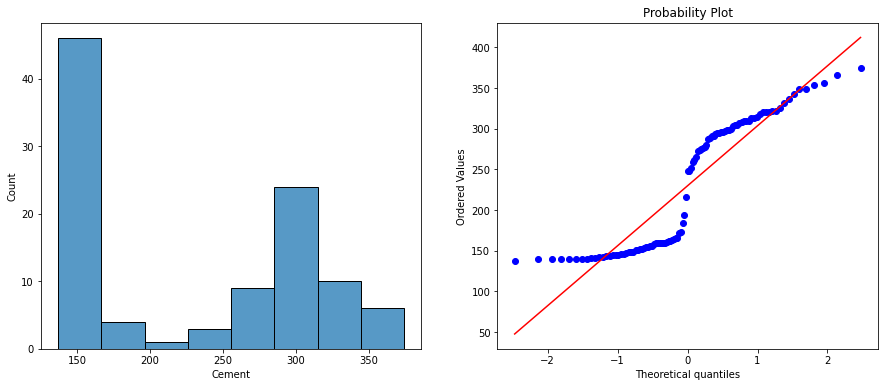

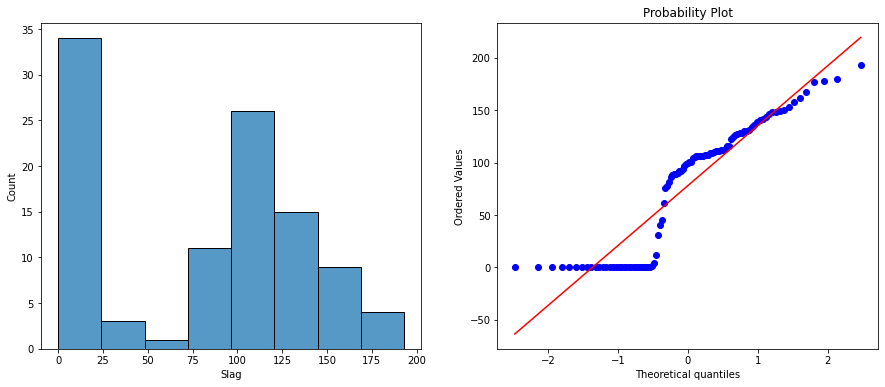

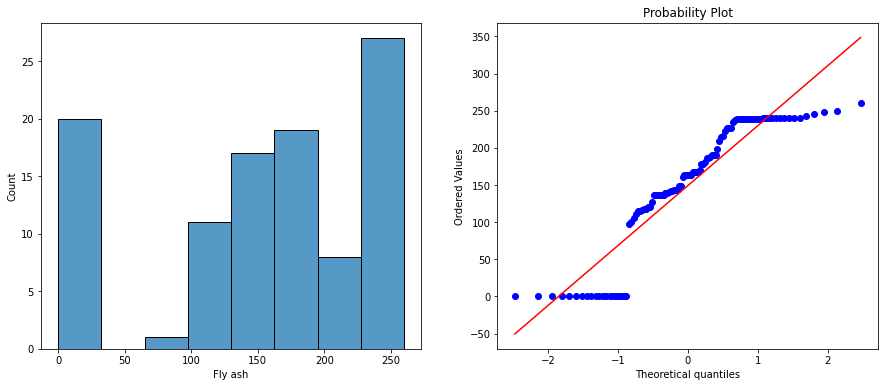

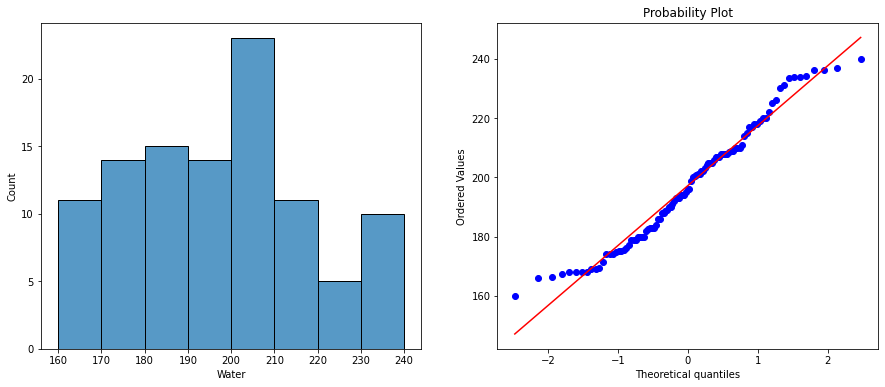

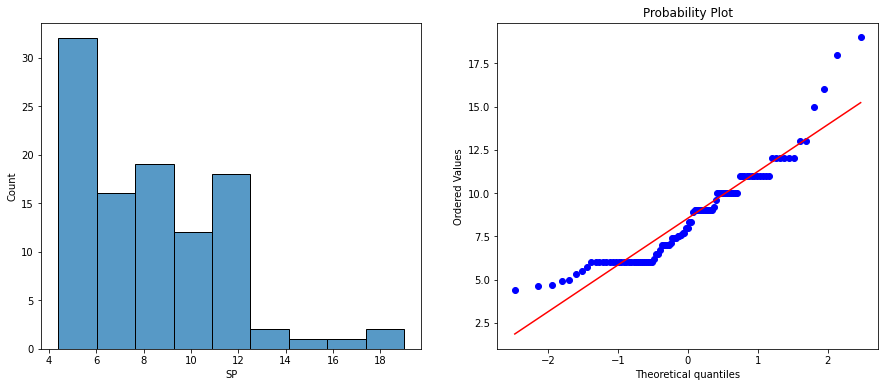

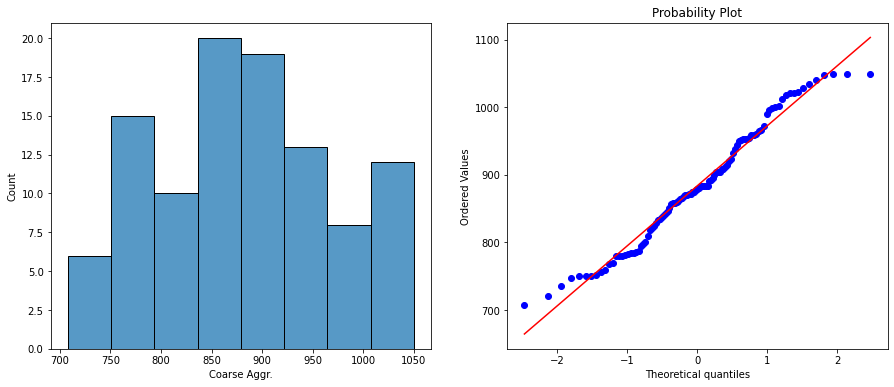

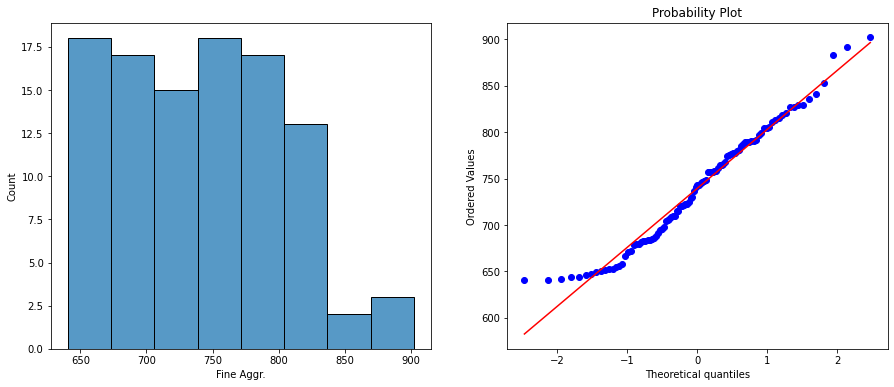

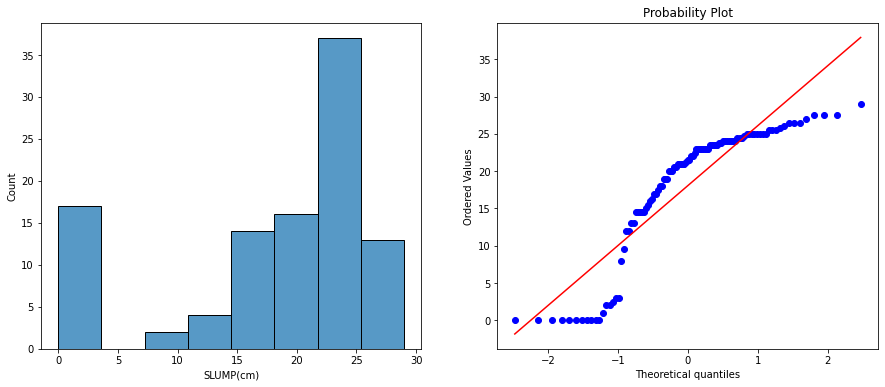

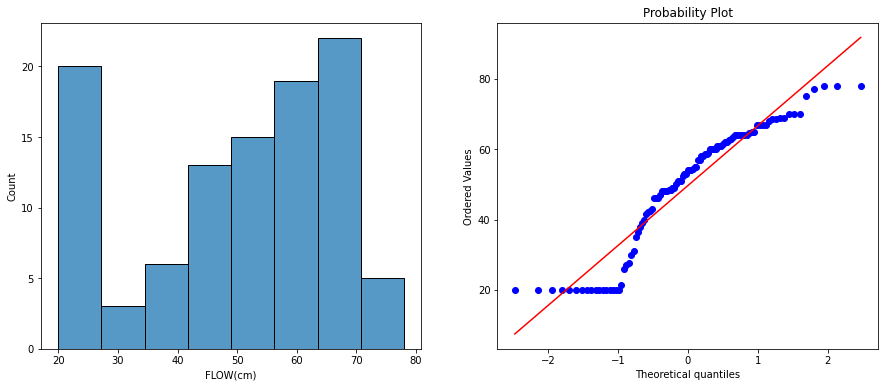

In [48]:
for col in df.drop("Compressive Strength (28-day)(Mpa)", axis=1).columns:
    check_dist(df, col)

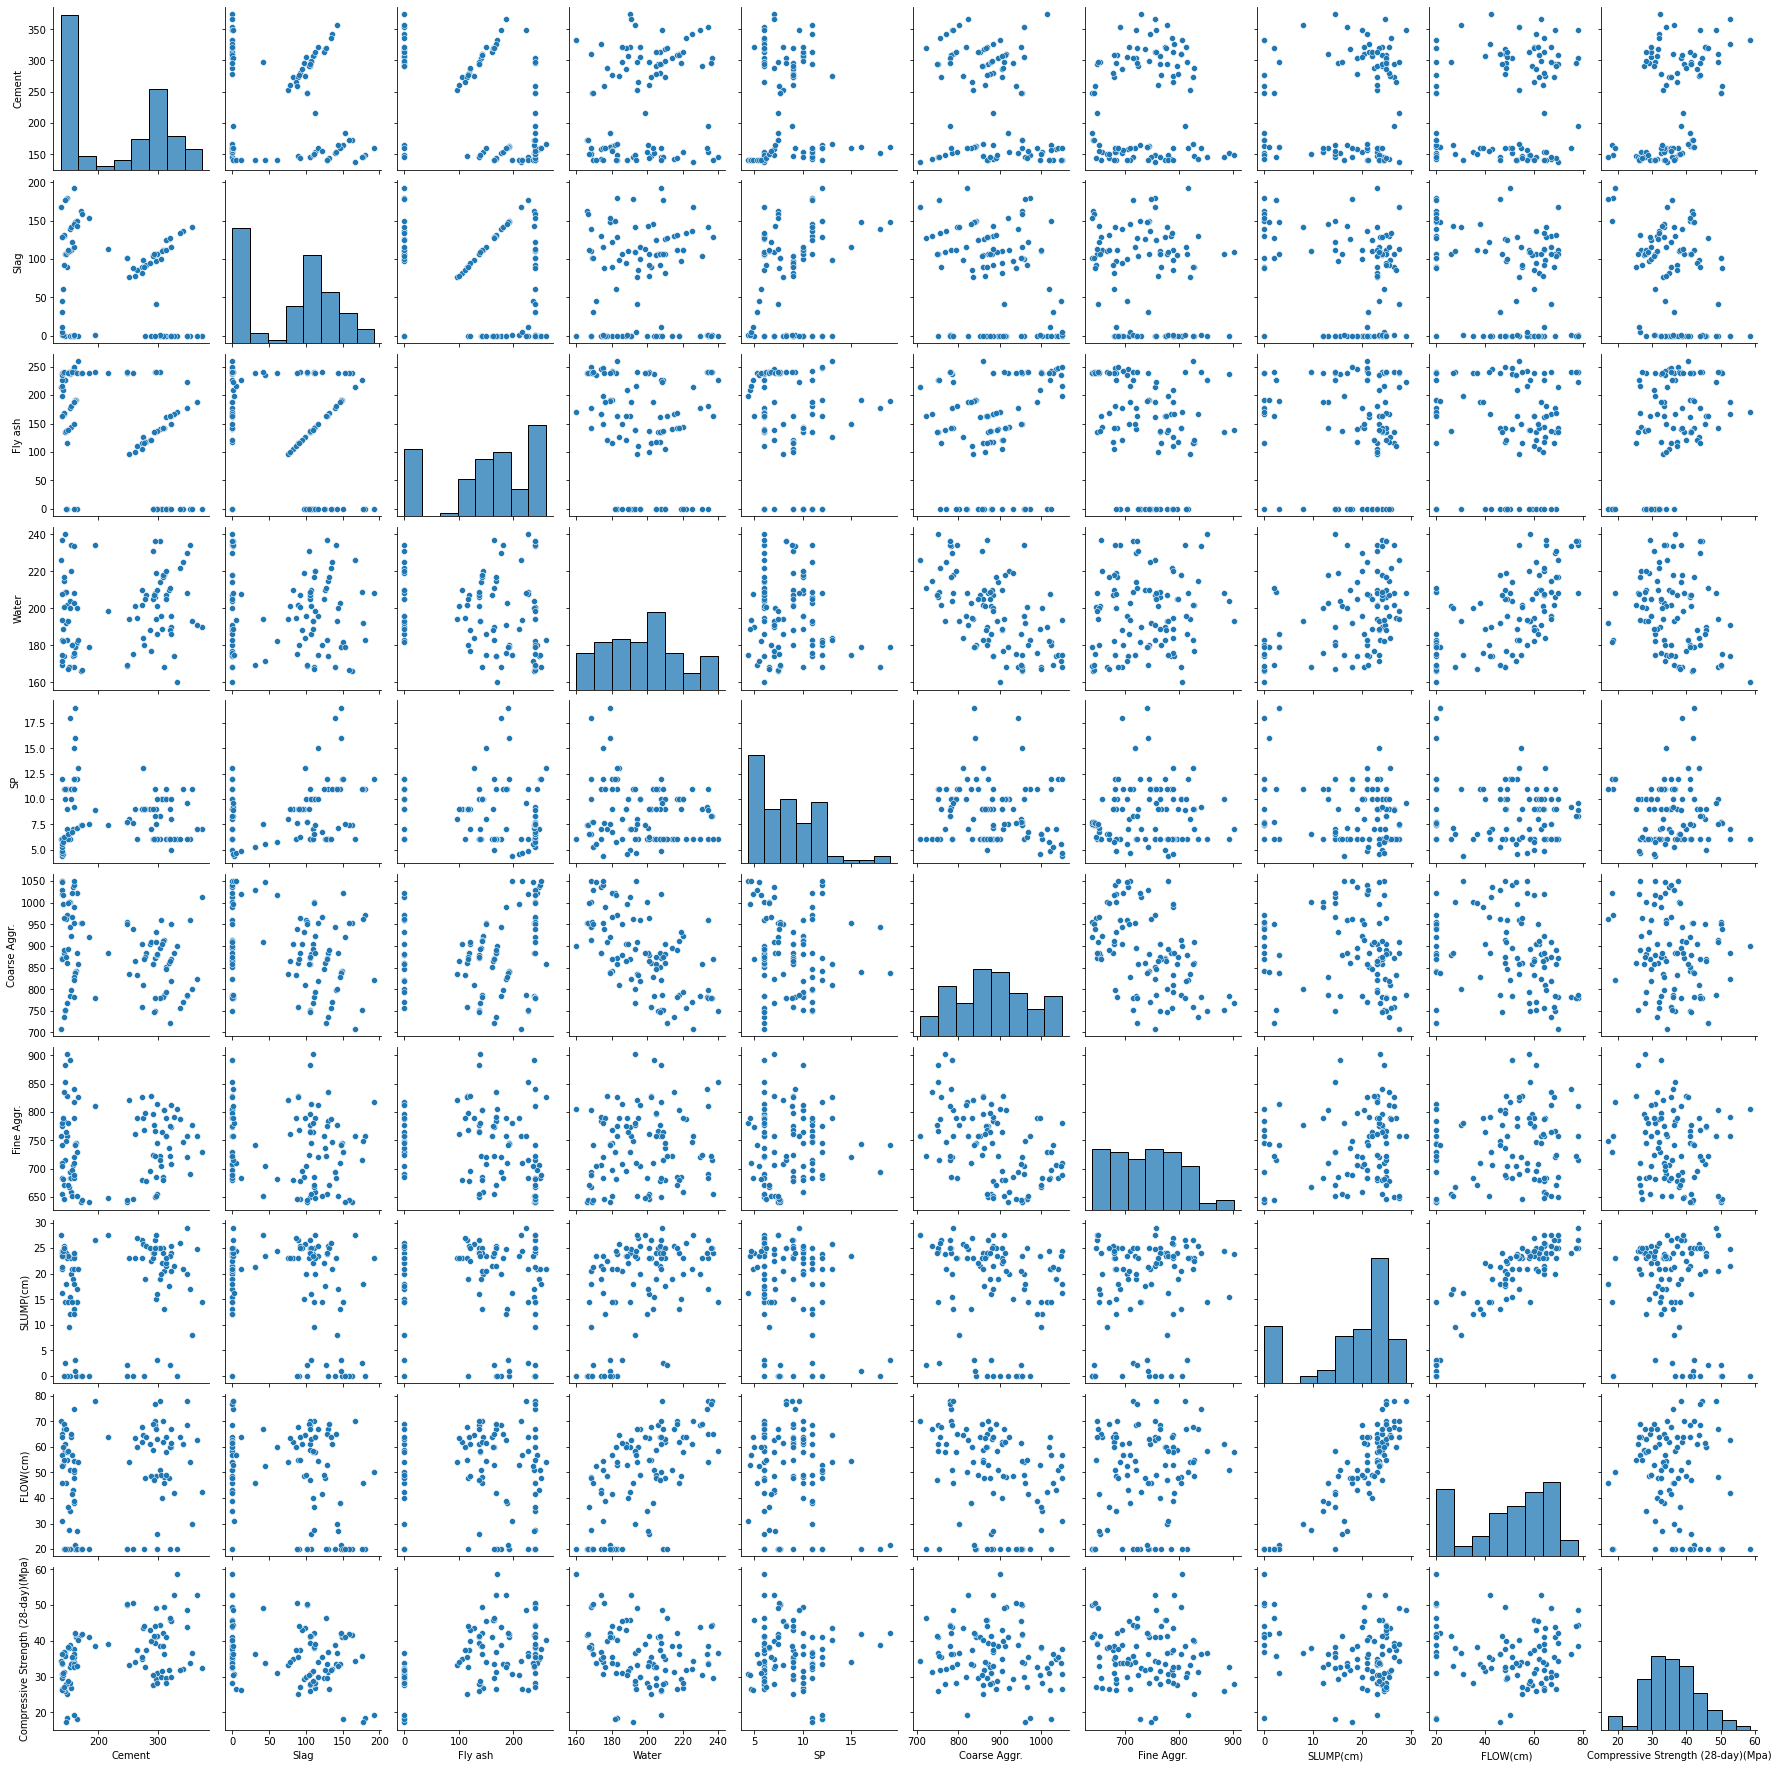

In [49]:
sns.pairplot(df); 

In [50]:
df.corr()

,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm),Compressive Strength (28-day)(Mpa)
Cement,1.000,-0.244,-0.487,0.221,-0.106,-0.310,0.057,0.146,0.186,0.446
Slag,-0.244,1.000,-0.323,-0.027,0.307,-0.224,-0.184,-0.284,-0.327,-0.332
Fly ash,-0.487,-0.323,1.000,-0.241,-0.144,0.173,-0.283,-0.119,-0.055,0.444
Water,0.221,-0.027,-0.241,1.000,-0.155,-0.602,0.115,0.467,0.632,-0.254
SP,-0.106,0.307,-0.144,-0.155,1.000,-0.104,0.058,-0.213,-0.176,-0.038
Coarse Aggr.,-0.310,-0.224,0.173,-0.602,-0.104,1.000,-0.489,-0.188,-0.326,-0.161
Fine Aggr.,0.057,-0.184,-0.283,0.115,0.058,-0.489,1.000,0.202,0.190,-0.155
SLUMP(cm),0.146,-0.284,-0.119,0.467,-0.213,-0.188,0.202,1.000,0.906,-0.223
FLOW(cm),0.186,-0.327,-0.055,0.632,-0.176,-0.326,0.190,0.906,1.000,-0.124
Compressive Strength (28-day)(Mpa),0.446,-0.332,0.444,-0.254,-0.038,-0.161,-0.155,-0.223,-0.124,1.000


<AxesSubplot:>

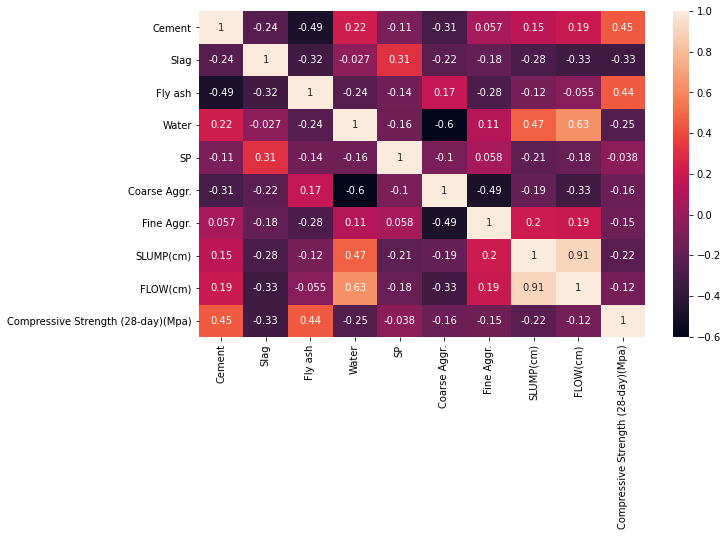

In [51]:
sns.heatmap(df.corr(), annot = True)

In [52]:
df2 = df.copy()

<AxesSubplot:xlabel='Compressive Strength (28-day)(Mpa)', ylabel='Count'>

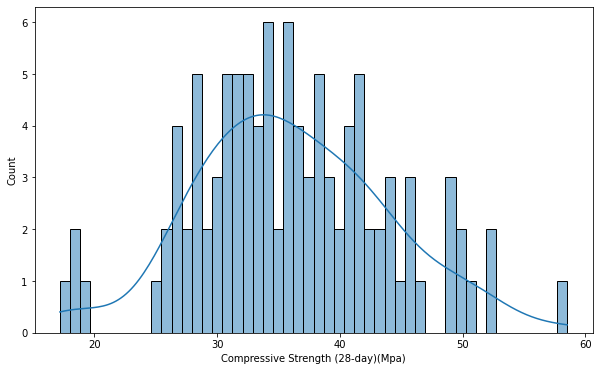

In [53]:
sns.histplot(df['Compressive Strength (28-day)(Mpa)'], bins=50, kde=True)

In [54]:
skew(df['Compressive Strength (28-day)(Mpa)'])

0.18907291231552745

<AxesSubplot:xlabel='Compressive Strength (28-day)(Mpa)'>

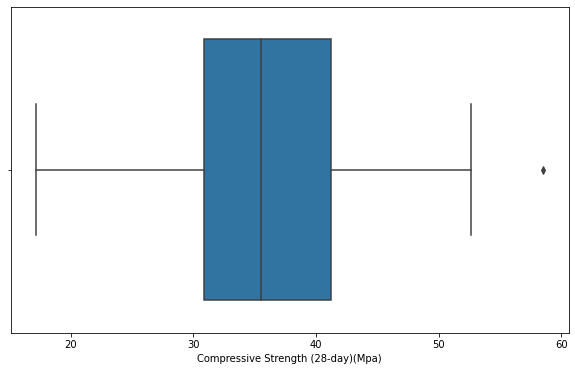

In [55]:
sns.boxplot(df['Compressive Strength (28-day)(Mpa)'])

In [56]:
df.isnull().sum()

Cement                                0
Slag                                  0
Fly ash                               0
Water                                 0
SP                                    0
Coarse Aggr.                          0
Fine Aggr.                            0
SLUMP(cm)                             0
FLOW(cm)                              0
Compressive Strength (28-day)(Mpa)    0
dtype: int64

In [57]:
corr_by_CS = df.corr()["Compressive Strength (28-day)(Mpa)"].sort_values()[:-1]
corr_by_CS

Slag           -0.332
Water          -0.254
SLUMP(cm)      -0.223
Coarse Aggr.   -0.161
Fine Aggr.     -0.155
FLOW(cm)       -0.124
SP             -0.038
Fly ash         0.444
Cement          0.446
Name: Compressive Strength (28-day)(Mpa), dtype: float64

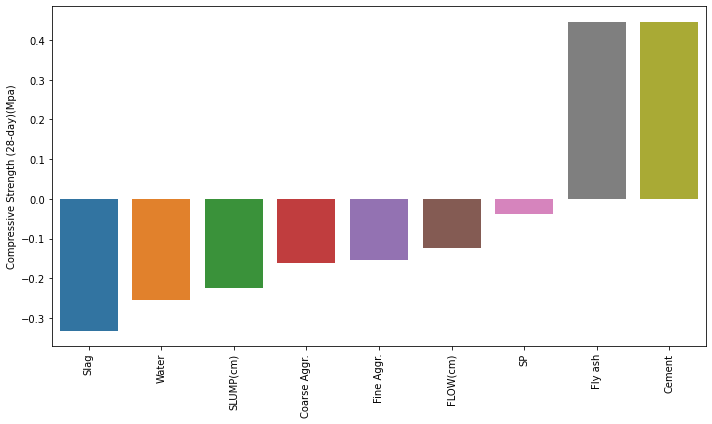

In [58]:
plt.figure(figsize = (10,6))
sns.barplot(x = corr_by_CS.index, y = corr_by_CS)
plt.xticks(rotation=90)
plt.tight_layout();

# Data Preprocessing 

### Features and target variable

In [59]:
X = df.drop(columns ="Compressive Strength (28-day)(Mpa)") 
y = df["Compressive Strength (28-day)(Mpa)"]

### Splitting data into training and testing

In [61]:
from sklearn.model_selection import train_test_split

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state =42)

In [63]:
df.sample(10)

,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm),Compressive Strength (28-day)(Mpa)
48,332.000,0.000,170.000,160.000,6.000,900.000,806.000,0.000,20.000,58.530
28,298.000,107.000,137.000,201.000,6.000,878.000,655.000,16.000,26.000,41.270
2,162.000,148.000,191.000,179.000,16.000,840.000,743.000,1.000,20.000,41.810
31,349.000,0.000,178.000,230.000,6.000,785.000,721.000,20.000,68.500,43.950
73,294.000,106.000,136.000,207.000,6.000,747.000,778.000,24.000,47.000,41.270
10,145.000,106.000,136.000,208.000,10.000,751.000,883.000,24.500,61.000,26.020
82,160.200,0.300,240.000,233.500,9.200,781.000,841.100,24.000,75.000,36.190
99,248.000,101.000,239.900,169.100,7.700,949.900,644.100,2.000,20.000,50.230
45,318.000,126.000,0.000,210.000,6.000,861.000,737.000,17.500,48.000,31.770
12,142.000,130.000,167.000,215.000,6.000,735.000,836.000,25.500,67.000,31.370


In [64]:
print("Train features shape : ", X_train.shape)
print("Train target shape   : ", y_train.shape)
print("Test features shape  : ", X_test.shape)
print("Test target shape    : ", y_test.shape)

Train features shape :  (82, 9)
Train target shape   :  (82,)
Test features shape  :  (21, 9)
Test target shape    :  (21,)


## Scaling

In [66]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

scaler = StandardScaler()

In [67]:
scaler.fit(X_train)

StandardScaler()

In [68]:
X_train_scaled = scaler.transform(X_train)   # standard scale e ait denlem ile X_train i dönüştürüyor.
X_train_scaled

array([[ 0.99742015, -1.29720985, -0.03597016,  1.05552803,  0.49979299,
         0.26854971, -0.94918597,  0.70678525,  0.76407019],
       [-1.04096079,  1.65777393, -1.64936204, -0.65655824,  0.84332212,
         0.95172686,  0.28924939, -1.96043118, -1.59112335],
       [ 1.13668842,  0.78769537,  0.21399196,  0.71311078, -0.87432353,
        -1.90623086, -0.2575922 , -1.73816315, -1.59112335],
       [ 0.85815189,  0.45936384, -1.64936204, -0.50980799, -0.87432353,
        -0.10719771,  1.2220968 , -1.62702913, -1.59112335],
       [ 0.22891256,  0.36086438,  1.06727175, -1.34628443, -0.29032401,
         0.74905097, -1.58287887, -1.96043118, -1.59112335],
       [-0.90169252,  0.60711303,  0.04356324, -1.04789225,  2.21743863,
         0.73538743, -0.30584293,  0.65121824,  0.34349992],
       [ 0.80750889,  0.44294726, -0.10414165,  0.51744378, -0.87432353,
        -1.61018743,  0.62700448,  0.70678525, -0.07707036],
       [-0.93967478, -1.29720985,  1.11158322, -0.80330849,  0

In [69]:
X_test_scaled = scaler.transform(X_test)
X_test_scaled

array([[ 1.14934917, -1.29720985,  0.21399196, -0.31414099, -1.21785265,
        -0.20967429,  0.56267018,  0.70678525,  0.65191812],
       [-0.81306726, -1.29720985,  1.30473577, -0.65655824,  1.53038037,
        -0.33492343,  1.41509971,  0.37338319,  0.3154619 ],
       [ 0.87081264,  0.45936384, -1.64936204,  0.66419403,  0.49979299,
        -0.08442514,  0.09624647,  0.81791927,  0.82014623],
       [ 0.71888363,  0.24594834, -0.27457037, -0.41197449,  0.15626386,
         0.17745943, -0.69184876,  0.81791927,  0.70799416],
       [-0.88903177,  1.09961032,  0.48667792,  0.32177677,  0.84332212,
        -0.676512  , -0.46667869, -0.51568895, -0.58175469],
       [-1.07894304,  1.6085242 ,  0.92979259,  0.61527728,  0.84332212,
        -1.553256  , -0.38626081, -1.68259614, -1.59112335],
       [-0.94727123,  0.70725415,  1.07749748, -0.80820017, -0.63385314,
         0.89251817, -1.39148432, -0.34898792, -0.38548856],
       [ 1.11136691,  0.77127879, -1.64936204,  0.66419403, -0

In [70]:
pd.DataFrame(X_train_scaled).agg(["mean", "std"]).round(3)

,0,1,2,3,4,5,6,7,8
mean,-0.000,0.000,0.000,-0.000,0.000,0.000,0.000,-0.000,-0.000
std,1.006,1.006,1.006,1.006,1.006,1.006,1.006,1.006,1.006


In [71]:
pd.DataFrame(X_test_scaled).agg(["mean", "std"]).round(3)

,0,1,2,3,4,5,6,7,8
mean,-0.020,-0.084,0.214,0.179,-0.009,-0.248,0.046,0.223,0.340
std,0.993,0.958,0.816,0.926,0.802,1.007,1.092,0.826,0.868


In [72]:
print("X_train_min :", np.min(X_train))
print("X_train_max :", np.max(X_train))
print("X_test_min  :", np.min(X_test))
print("X_test_max  :", np.max(X_test))
print("--------------------------------------")
print("X_train_range :", np.min(X_train), "-", np.max(X_train))
print("X_test_range  :", np.min(X_test), "-", np.max(X_test))
print("--------------------------------------")
print("X_train_scaled_range :", np.min(X_train_scaled), "-", np.max(X_train_scaled))
print("X_test_scaled_range  :", np.min(X_test_scaled), "-", np.max(X_test_scaled))

X_train_min : Cement         137.000
Slag             0.000
Fly ash          0.000
Water          160.000
SP               4.400
Coarse Aggr.   708.000
Fine Aggr.     640.600
SLUMP(cm)        0.000
FLOW(cm)        20.000
dtype: float64
X_train_max : Cement          374.000
Slag            193.000
Fly ash         250.000
Water           240.000
SP               19.000
Coarse Aggr.   1049.900
Fine Aggr.      902.000
SLUMP(cm)        29.000
FLOW(cm)         78.000
dtype: float64
X_test_min  : Cement         140.500
Slag             0.000
Fly ash          0.000
Water          168.000
SP               4.600
Coarse Aggr.   735.000
Fine Aggr.     646.000
SLUMP(cm)        0.000
FLOW(cm)        20.000
dtype: float64
X_test_max  : Cement          349.000
Slag            177.000
Fly ash         260.000
Water           236.200
SP               13.000
Coarse Aggr.   1017.700
Fine Aggr.      883.000
SLUMP(cm)        26.500
FLOW(cm)         77.000
dtype: float64
--------------------------------------

##  1. Model Building (Linear Regression)

In [73]:
from sklearn.linear_model import LinearRegression

In [80]:
def train_val(model, X_train, y_train, X_test, y_test):
    
    y_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)
    
    scores = {"train": {"R2" : r2_score(y_train, y_train_pred),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),                          
    "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},
    
    "test": {"R2" : r2_score(y_test, y_pred),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}}
    
    return pd.DataFrame(scores)

In [81]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [82]:
pd.options.display.float_format = '{:.3f}'.format

In [125]:
ls = train_val(lm, X_train, y_train, X_test, y_test)
ls 

,train,test
R2,0.907,0.912
mae,1.936,1.740
mse,5.874,4.454
rmse,2.424,2.111


### 1.1 Interpret the model

In [85]:
lm.coef_

array([ 0.05418994, -0.03649207,  0.04467527, -0.23337395,  0.04160126,
       -0.06008875, -0.04199926, -0.24320324,  0.082191  ])

In [86]:
lm.intercept_

149.99017471432887

In [87]:
my_dict = {"Actual": y_test, "Pred": y_pred, "Residual":y_test-y_pred, "LSE":(y_test-y_pred)**2, "ABS": abs(y_test-y_pred)}

In [88]:
comparing = pd.DataFrame(my_dict)
comparing

,Actual,Pred,Residual,LSE,ABS
30,45.820,44.889,0.931,0.867,0.931
67,40.340,41.416,-1.076,1.158,1.076
62,28.290,28.566,-0.276,0.076,0.276
47,43.010,39.400,3.610,13.031,3.610
42,33.510,35.143,-1.633,2.667,1.633
40,35.660,39.032,-3.372,11.370,3.372
90,35.520,37.359,-1.839,3.380,1.839
45,31.770,30.865,0.905,0.819,0.905
10,26.020,28.773,-2.753,7.578,2.753
0,34.990,34.471,0.519,0.269,0.519


In [89]:
result_sample = comparing.iloc[:, :3]
result_sample

,Actual,Pred,Residual
30,45.820,44.889,0.931
67,40.340,41.416,-1.076
62,28.290,28.566,-0.276
47,43.010,39.400,3.610
42,33.510,35.143,-1.633
40,35.660,39.032,-3.372
90,35.520,37.359,-1.839
45,31.770,30.865,0.905
10,26.020,28.773,-2.753
0,34.990,34.471,0.519


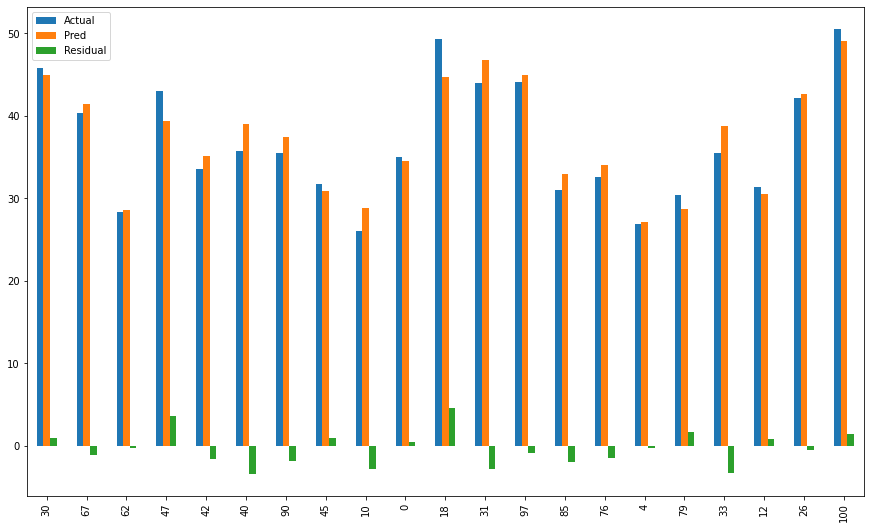

In [90]:
result_sample.plot(kind ="bar", figsize=(15,9))
plt.show()

In [91]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [92]:
R2_score = r2_score(y_test, y_pred)
R2_score

0.9119667722073422

* Elimdeki veriler doğru tahmin yapmak için 91% oranında yeterli.

In [93]:
mae = mean_absolute_error(y_test, y_pred) #comparing.ABS.sum()/X_test.shape[0]
mae

1.740383350475173

In [94]:
mse = mean_squared_error(y_test, y_pred) # comparing.LSE.sum()/X_test.shape[0]
mse

4.454236789564614

In [95]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred)) #(comparing.LSE.sum()/X_test.shape[0])**0.5
rmse

2.110506287497058

In [96]:
CS_mean = df["Compressive Strength (28-day)(Mpa)"].mean()
CS_mean

36.03873786407767

In [97]:
mae / CS_mean

0.0482920172465289

* Model MAE'ye göre ortalama 4% hata yapiyor.

In [98]:
rmse / CS_mean

0.05856215873754967

* Model RMSE'ye göre ortalama 5% hata yapiyor.

In [100]:
def adj_r2(y_test, y_pred, X):
    r2 = r2_score(y_test, y_pred)
    n = X.shape[0] # number of observations (rows)
    p = X.shape[1] # number of independent variables (features)
    adj_r2 = 1 - (1-r2)*(n-1)/(n-p-1) # buradaki denklem satır ve sütun sayısı arasındaki dengeyi sağlamak üzerine kurgulanmış
    return adj_r2

In [101]:
X.shape

(103, 9)

In [102]:
adj_r2(y_test, y_pred, df)

0.9023979430994447

* adjusted R2 ve R2 skorlar arasında çok fazla büyük bir fark yok


### 1.2 Model Evaluation

In [103]:
def eval_metric(actual, pred):
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    rmse = np.sqrt(mean_squared_error(actual, pred))
    R2_score = r2_score(actual, pred)
    print("Model testing performance:")
    print("--------------------------")
    print(f"R2_score : {R2_score}")
    print(f"MAE {'':<5}: {mae}")
    print(f"MSE {'':<5}: {mse}")
    print(f"RMSE{'':<5}: {rmse}")

In [104]:
# test datamın eval metrik değeleri

eval_metric(y_test, y_pred)

Model testing performance:
--------------------------
R2_score : 0.9119667722073422
MAE      : 1.740383350475173
MSE      : 4.454236789564614
RMSE     : 2.110506287497058


In [105]:
y_train_pred = lm.predict(X_train)

In [106]:
# train datamın eval metrik değeleri

eval_metric(y_train, y_train_pred)

Model testing performance:
--------------------------
R2_score : 0.9071449835138068
MAE      : 1.9362628449839163
MSE      : 5.874312561857198
RMSE     : 2.4236981168984717


## Is data suitable for linear regression?

## Plotting residuals

In [107]:
residuals = y_test-y_pred

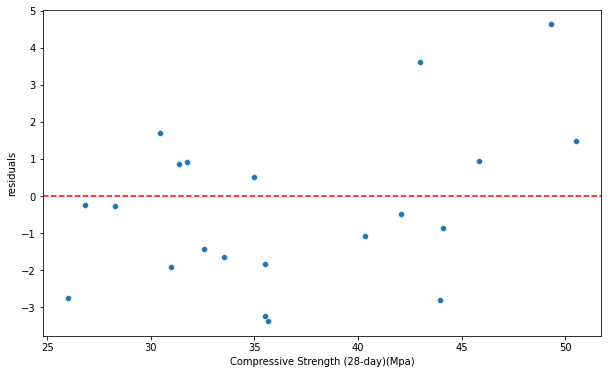

In [108]:
plt.figure(figsize = (10,6))
sns.scatterplot(x = y_test, y = residuals) #-residuals
plt.axhline(y = 0, color ="r", linestyle = "--")
plt.ylabel("residuals")
plt.show()

<AxesSubplot:xlabel='Compressive Strength (28-day)(Mpa)', ylabel='Density'>

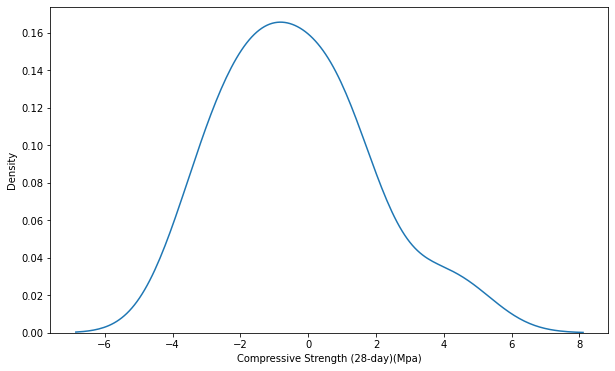

In [109]:
sns.kdeplot(residuals)

* Normal dagilima yakin duruyor. Hafif rihgt skewed oldugu görülüyor.

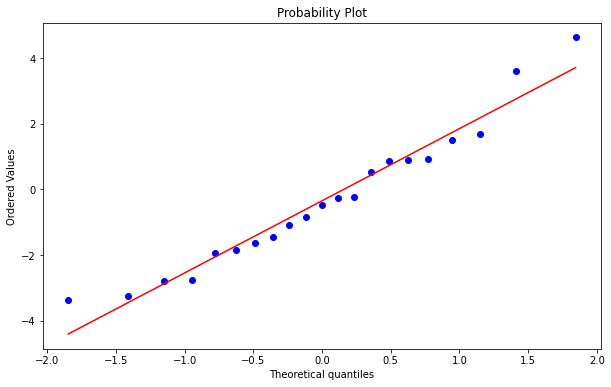

In [110]:
stats.probplot(residuals, dist ="norm", plot =plt);

* verilerim kırmızı çizginin etrafında sarmaşık gibi dolandigindan normal dağılıma yakın demektir.

In [112]:
from scipy.stats import skew
skew(residuals)

0.6026499074920357

* lineer regresyon uygulayabilmemiz için kabul edilebilir skewness aralığı -1 ile +1 arasında oldugundan lineer regresyon uygulayabiliriz.
* skew degerim 0.5 ile 1 arasinda oldugundan orta seviyede (moderate) skewness olduğunu söyleyebilirim.

# 2. Regularization

## 2.1 Ridge (Apply and evaluate)

In [129]:
from sklearn.linear_model import Ridge

In [130]:
ridge_model = Ridge(alpha=1)

In [131]:
ridge_model.fit(X_train_scaled, y_train)

Ridge(alpha=1)

In [136]:
train_val(ridge_model, X_train_scaled, y_train, X_test_scaled, y_test)

,train,test
R2,0.906,0.911
mae,1.938,1.732
mse,5.922,4.493
rmse,2.434,2.120


In [137]:
# Cross Validation

model = Ridge()
scores = cross_validate(model, X_train_scaled, y_train,
                        scoring=['r2', 'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv=10)

In [138]:
scores = pd.DataFrame(scores, index = range(1, 11))
scores.iloc[:,2:].mean()

test_r2                             0.829
test_neg_mean_absolute_error       -2.222
test_neg_mean_squared_error        -7.829
test_neg_root_mean_squared_error   -2.696
dtype: float64

### Finding best alpha for Ridge


In [139]:
from sklearn.model_selection import GridSearchCV

In [155]:
alpha_space = np.linspace(0.01, 1, 100)
alpha_space

array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ])

In [156]:
ridge_model = Ridge()

param_grid = {'alpha':alpha_space}

ridge_grid_model = GridSearchCV(estimator=ridge_model,
                          param_grid=param_grid,
                          scoring='neg_root_mean_squared_error',
                          cv=10,
                          n_jobs = -1)

In [157]:
ridge_grid_model.fit(X_train_scaled,y_train)

GridSearchCV(cv=10, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ])},
             scoring='neg_root_mean_squared_error')

In [176]:
ridge_grid_model.best_params_

{'alpha': 0.92}

In [177]:
ridge_grid_model.best_score_

-2.696392988643865

In [218]:
rs = train_val(ridge_grid_model, X_train_scaled, y_train, X_test_scaled, y_test)
rs

,train,test
R2,0.906,0.911
mae,1.938,1.732
mse,5.917,4.485
rmse,2.432,2.118


## 2.2 Lasso (Apply and evalute)

In [163]:
from sklearn.linear_model import Lasso

In [164]:
lasso_model = Lasso()
lasso_model.fit(X_train_scaled, y_train)

Lasso()

In [165]:
train_val(lasso_model, X_train_scaled, y_train, X_test_scaled, y_test)

,train,test
R2,0.776,0.802
mae,2.960,2.466
mse,14.144,10.036
rmse,3.761,3.168


In [ ]:
# Cross Validation


In [166]:
model = Lasso()
scores = cross_validate(model, X_train_scaled, y_train,
                        scoring=['r2', 'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv=10)

In [167]:
scores = pd.DataFrame(scores, index = range(1, 11))
scores.iloc[:,2:].mean()

test_r2                              0.659
test_neg_mean_absolute_error        -3.220
test_neg_mean_squared_error        -17.123
test_neg_root_mean_squared_error    -3.995
dtype: float64

In [168]:
# Finding best alpha for Lasso
lasso_model = Lasso()

param_grid = {'alpha':alpha_space}

lasso_grid_model = GridSearchCV(estimator=lasso_model,
                          param_grid=param_grid,
                          scoring='neg_root_mean_squared_error',
                          cv=10,
                          n_jobs = -1)

In [169]:
lasso_grid_model.fit(X_train_scaled,y_train)

GridSearchCV(cv=10, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ])},
             scoring='neg_root_mean_squared_error')

In [170]:
lasso_grid_model.best_params_

{'alpha': 0.03}

In [171]:
lasso_grid_model.best_score_

-2.725010118649377

In [172]:
lss = train_val(lasso_grid_model, X_train_scaled, y_train, X_test_scaled, y_test)
lss

,train,test
R2,0.905,0.912
mae,1.941,1.722
mse,6.003,4.439
rmse,2.450,2.107


## 2.3 Elastic-Net (Apply and evaluate )
* Use Gridsearch for hyperparameter tuning instead of ElacticnetCV

In [181]:
from sklearn.linear_model import ElasticNet

In [182]:
elastic_model = ElasticNet()
elastic_model.fit(X_train_scaled,y_train)

ElasticNet()

In [183]:
train_val(elastic_model, X_train_scaled, y_train, X_test_scaled, y_test)

,train,test
R2,0.637,0.635
mae,3.803,3.556
mse,22.982,18.466
rmse,4.794,4.297


In [187]:
# Cross Validation
model = ElasticNet()
scores = cross_validate(model, X_train_scaled, y_train,
                        scoring=['r2', 'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv=10)

In [188]:
scores = pd.DataFrame(scores, index = range(1, 11))
scores.iloc[:,2:].mean()

test_r2                              0.504
test_neg_mean_absolute_error        -4.080
test_neg_mean_squared_error        -26.691
test_neg_root_mean_squared_error    -5.043
dtype: float64

In [209]:
# Finding best alpha and l1_ratio for ElasticNet
elastic_model = ElasticNet()

param_grid = {'alpha':[0.008, 0.009, 0.01, 0.02, 0.03],
              'l1_ratio':[.5, .7, .9, .95, .99, 1]}

elastic_grid_model = GridSearchCV(estimator=elastic_model,
                          param_grid=param_grid,
                          scoring='neg_root_mean_squared_error',
                          cv=10,
                          n_jobs = -1)


In [210]:
elastic_grid_model.fit(X_train_scaled,y_train)

GridSearchCV(cv=10, estimator=ElasticNet(), n_jobs=-1,
             param_grid={'alpha': [0.008, 0.009, 0.01, 0.02, 0.03],
                         'l1_ratio': [0.5, 0.7, 0.9, 0.95, 0.99, 1]},
             scoring='neg_root_mean_squared_error')

In [211]:
elastic_grid_model.best_params_

{'alpha': 0.02, 'l1_ratio': 0.5}

In [212]:
elastic_grid_model.best_score_

-2.701893156411514

In [219]:
es = train_val(elastic_grid_model, X_train_scaled, y_train, X_test_scaled, y_test)
es

,train,test
R2,0.906,0.911
mae,1.937,1.724
mse,5.936,4.489
rmse,2.436,2.119
